# Classifying Ionosphere structure using K nearest neigbours algorithm
<hr>

### Nearest neighbors
Amongst the standard machine algorithms, Nearest neighbors is perhaps one of the most intuitive algorithms. To predict the class of a new sample, we look through the training dataset for the samples that are most similar to our new sample.
We take the most similar sample and predict the class that the majority of those samples have. As an example, we wish to predict the class of the '?', based on which class it is more similar to (represented here by having similar objects closer together). We find the five nearest neighbors, which are three triangles, one circle and one plus. There are more
triangles than circles and plus, and hence the predicted class for the '?' is, therefore, a triangle.

<img src = "images/knn.png">

[[image source]](https://github.com/rasbt/python-machine-learning-book/tree/master/images/image_gallery)

Nearest neighbors can be used for nearly any dataset-however, since we will have to compute the distance between all pairs of samples, it can be very computationally expensive to do so.
For example if there are 10 samples in the dataset, there are 45 unique distances
to compute. However, if there are 1000 samples, there are nearly 500,000!

#### Distance metrics
If we have two samples, we need to know how close they are to each other. Further more, we need to answer
questions such as are these two samples more similar than the other two?
The most common distance metric that you might have heard of is Euclidean
distance, which is the real-world distance. Formally, Euclidean distance is the square root of the sum of the squared
distances for each feature. It is intuitive, albeit provides poor accuracy if some features have larger values than others. It also gives poor results when lots of features have a value of 0, i.e our data is 'sparse'. There are other distance metrics in use; two commonly employed ones are the Manhattan and Cosine distance. The Manhattan distance is the sum of the absolute differences in each feature (with no use of square distances). While the Manhattan distance does suffer if
some features have larger values than others, the effect is not as dramatic as in the
case of Euclidean. Regardless for the implementation of KNN algorithm here, we would consider the Euclidean distance.

## Dataset

To understand KNNs, We will use the Ionosphere dataset, which is the recording of many
high-frequency antennas. The aim of the antennas is to determine whether there is a
structure in the ionosphere and a region in the upper atmosphere. Those that have a
structure are classified as good, while those that do not are classified as bad. Our aim is to determine whether an image
is good or bad.
You can download the dataset from : http://archive.ics.uci.edu/ml/datasets/Ionosphere.
Save the ionosphere.data file from the Data Folder to a folder named "data" on your computer. 

For each row in the dataset, there are 35 values. The first 34 are measurements taken
from the 17 antennas (two values for each antenna). The last is either 'g' or 'b'; that
stands for good and bad, respectively.

In [1]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open("data/Ionosphere/ionosphere.data", 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

First, we load up the NumPy and csv modules. Then we create the X and y NumPy arrays to store the dataset in. The sizes of these
arrays are known from the dataset. We take the first 34 values from this sample, turn each into a float, and save that to
our dataset. Finally, we take the last value of the row and set the class. We set it to 1 (or True) if it
is a good sample, and 0 if it is not. We now have a dataset of samples and features in X, and the corresponding classes in y

Estimators in scikit-learn have two main functions: fit() and predict().
We train the algorithm using the fit method and our training set. We evaluate it
using the predict method on our testing set.
First, we need to create these training and testing sets. As before, import and run the
train_test_split function:

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


Then, we import the nearest neighbor class and create an instance for it using the default parameters. By default, the algorithm will choose the five nearest neighbors to predict
the class of a testing sample:

In [12]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

After creating our estimator, we must then fit it on our training dataset. For the
nearest neighbor class, this records our dataset, allowing us to find the nearest
neighbor for a new data point, by comparing that point to the training dataset:
estimator.fit(X_train, y_train)
We then train the algorithm with our test set and evaluate with our testing set:

In [13]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


This scores 86.4 percent accuracy, which is impressive for a default algorithm and
just a few lines of code! Most scikit-learn default parameters are chosen explicitly
to work well with a range of datasets. However, you should always aim to choose
parameters based on knowledge of the application experiment.

In [15]:
from sklearn.cross_validation import cross_val_score

In [16]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


Using cross validation, the model this gives a slightly more modest result of 82.3 percent, but it is still quite good
considering we have not yet tried setting better parameters.

### Tuning parameters
Almost all data mining algorithms have parameters that the user can set. This is
often a cause of generalizing an algorithm to allow it to be applicable in a wide
variety of circumstances. Setting these parameters can be quite difficult, as choosing
good parameter values is often highly reliant on features of the dataset.
The nearest neighbor algorithm has several parameters, but the most important
one is that of the number of nearest neighbors to use when predicting the class of
an unseen attribution. In scikit-learn, this parameter is called n_neighbors.
In the following figure, we show that when this number is too low, a randomly
labeled sample can cause an error. In contrast, when it is too high, the actual nearest
neighbors have a lower effect on the result. 

If we want to test a number of values for the n_neighbors parameter, for example,
each of the values from 1 to 20, we can rerun the experiment many times by setting
n_neighbors and observing the result:

In [17]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

We compute and store the average in our list of scores. We also store the full set of
scores for later analysis. We can then plot the relationship between the value of n_neighbors and the
accuracy.

In [18]:
%matplotlib inline

We then import pyplot from the matplotlib library and plot the parameter values
alongside average scores:

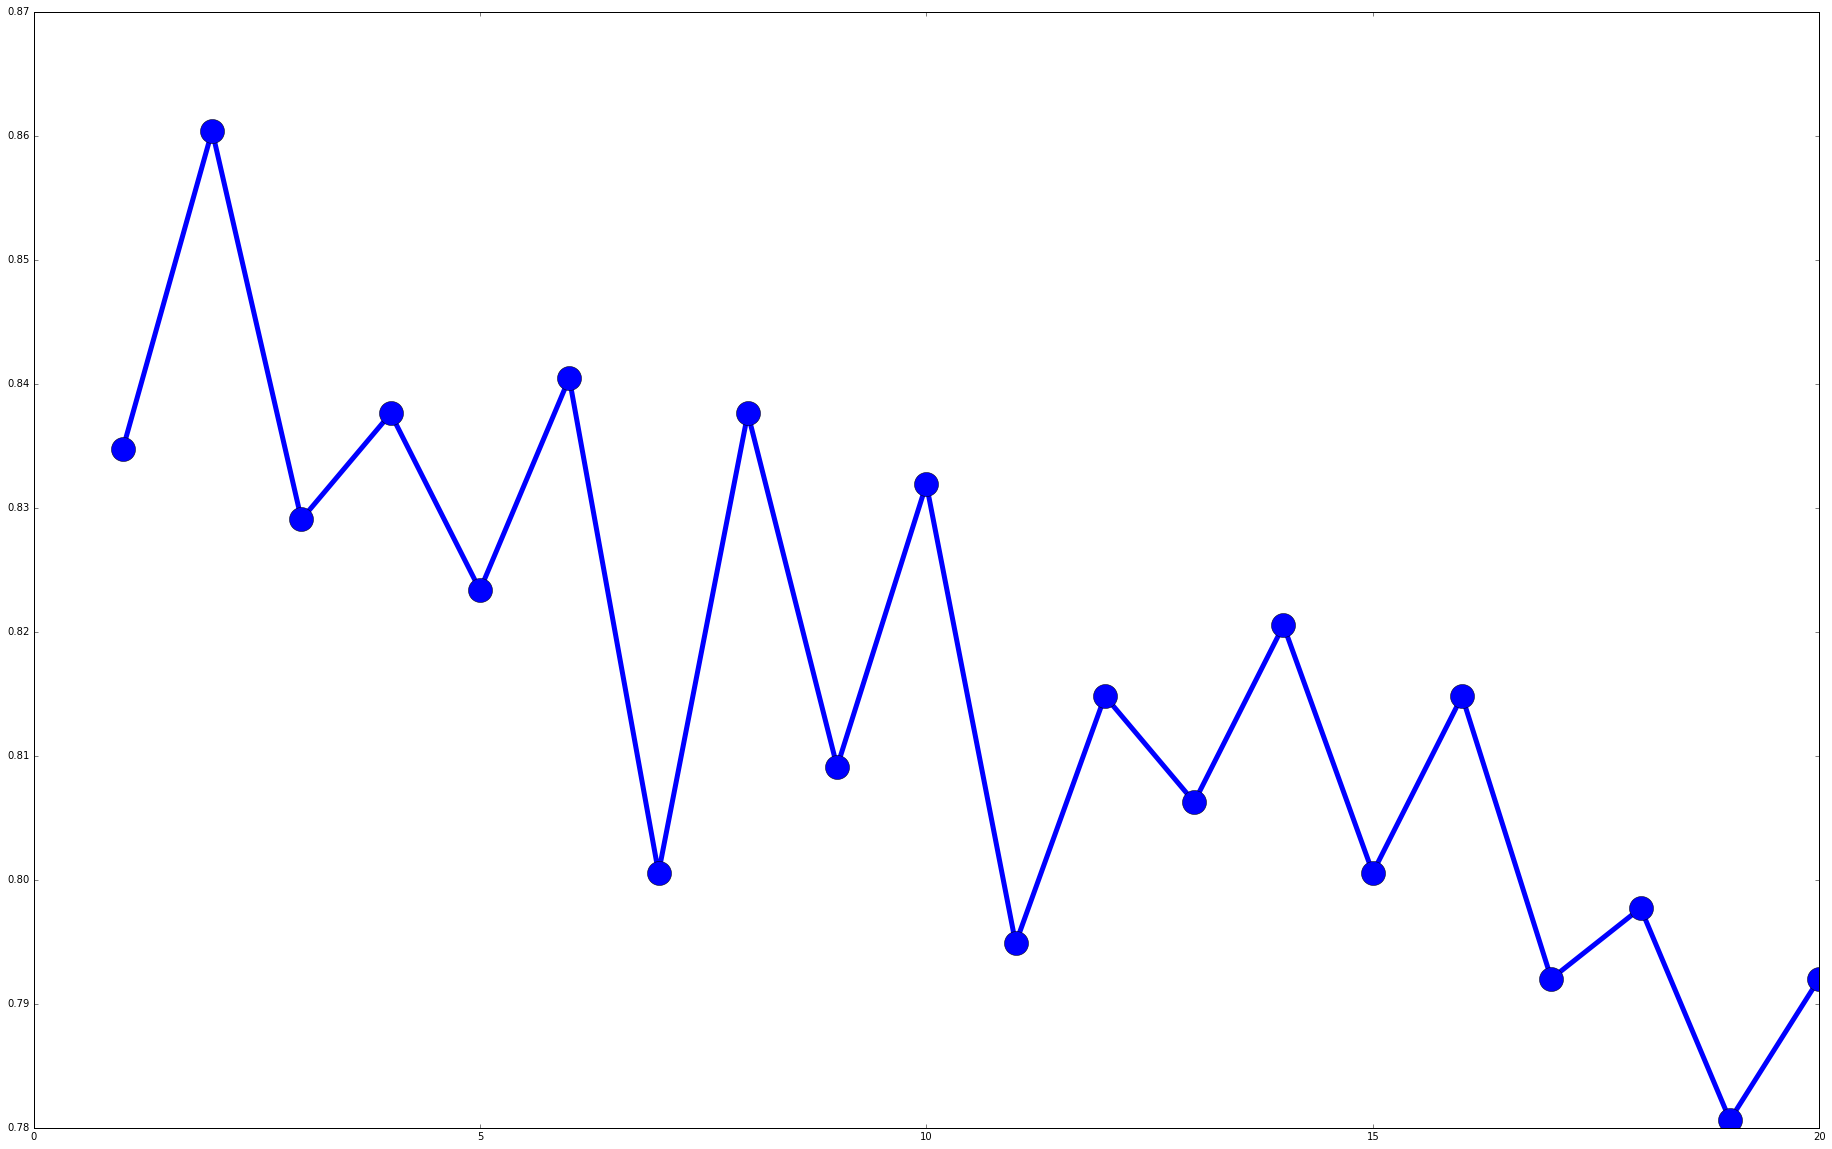

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

While there is a lot of variance, the plot shows a decreasing trend as the number of
neighbors increases.

### Preprocessing using pipelines
When taking measurements of real-world objects, we can often get features in
very different ranges. Like we saw in the case of classifying Animal data using Naive Bayes, if we are measuring the qualities of an animal,
we considered several features, as follows:

* Number of legs: This is between the range of 0-8 for most animals, while
some have many more!
* Weight: This is between the range of only a few micrograms, all the way
to a blue whale with a weight of 190,000 kilograms!
* Number of hearts: This can be between zero to five, in the case of
the earthworm.

For a mathematical-based algorithm to compare each of these features, the differences in the scale, range, and units can be difficult to interpret. If we used the above features in many algorithms, the weight would probably be the most
influential feature due to only the larger numbers and not anything to do with the actual effectiveness of the feature.
One of the methods to overcome this is to use a process called preprocessing to normalize the features so that they all have the same range, or are put into categories like small, medium and large. Suddenly, the large difference in the
types of features has less of an impact on the algorithm, and can lead to large
increases in the accuracy.
Preprocessing can also be used to choose only the more effective features, create new
features, and so on. Preprocessing in scikit-learn is done through Transformer
objects, which take a dataset in one form and return an altered dataset after some
transformation of the data. These don't have to be numerical, as Transformers are also
used to extract features-however, in this section, we will stick with preprocessing.
An example
We can show an example of the problem by breaking the Ionosphere dataset.
While this is only an example, many real-world datasets have problems of this
form. First, we create a copy of the array so that we do not alter the original dataset:

In [22]:
X_broken = np.array(X)

Next, we break the dataset by dividing every second feature by 10:


In [24]:
X_broken[:,::2] /= 10

In theory, this should not have a great effect on the result. After all, the values
for these features are still relatively the same. The major issue is that the scale has
changed and the odd features are now larger than the even features. We can see the
effect of this by computing the accuracy:

In [28]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.3%
The 'broken' average accuracy for is 70.4%


This gives a score of 82.3 percent for the original dataset, which drops down to
71.5 percent on the broken dataset. We can fix this by scaling all the features to
the range 0 to 1.

### Standard preprocessing
The preprocessing we will perform for this experiment is called feature-based
normalization through the MinMaxScaler class.

In [31]:
from sklearn.preprocessing import MinMaxScaler

This class takes each feature and scales it to the range 0 to 1. The minimum value is
replaced with 0, the maximum with 1, and the other values somewhere in between.
To apply our preprocessor, we run the transform function on it. While MinMaxScaler
doesn't, some transformers need to be trained first in the same way that the classifiers
do. We can combine these steps by running the fit_transform function instead:

In [32]:
X_transformed = MinMaxScaler().fit_transform(X)

Here, X_transformed will have the same shape as X. However, each column will
have a maximum of 1 and a minimum of 0.
There are various other forms of normalizing in this way, which is effective for other
applications and feature types:
* Ensure the sum of the values for each sample equals to 1, using sklearn.
preprocessing.Normalizer
* Force each feature to have a zero mean and a variance of 1, using sklearn.
preprocessing.StandardScaler, which is a commonly used starting point
for normalization
* Turn numerical features into binary features, where any value above
a threshold is 1 and any below is 0, using sklearn.preprocessing.
Binarizer .

We can now create a workflow by combining the code from the previous sections,
using the broken dataset previously calculated:


In [33]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y,scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The average accuracy for is 82.3%


This gives us back our score of 82.3 percent accuracy. The MinMaxScaler resulted in
features of the same scale, meaning that no features overpowered others by simply
being bigger values. While the Nearest Neighbor algorithm can be confused with
larger features, some algorithms handle scale differences better. In contrast, some
are much worse!

### Pipelines
As experiments grow, so does the complexity of the operations. We may split up
our dataset, binarize features, perform feature-based scaling, perform sample-based
scaling, and many more operations.
Keeping track of all of these operations can get quite confusing and can result in
being unable to replicate the result. Problems include forgetting a step, incorrectly
applying a transformation, or adding a transformation that wasn't needed.
Another issue is the order of the code. In the previous section, we created our
X_transformed dataset and then created a new estimator for the cross validation.
If we had multiple steps, we would need to track all of these changes to the dataset
in the code.
Pipelines are a construct that addresses these problems (and others, which we will
see in the next chapter). Pipelines store the steps in your data mining workflow. They
can take your raw data in, perform all the necessary transformations, and then create
a prediction. This allows us to use pipelines in functions such as cross_val_score,
where they expect an estimator. First, import the Pipeline object:

In [34]:
from sklearn.pipeline import Pipeline

Pipelines take a list of steps as input, representing the chain of the data mining
application. The last step needs to be an Estimator, while all previous steps are
Transformers. The input dataset is altered by each Transformer, with the output of
one step being the input of the next step. Finally, the samples are classified by the last
step's estimator. In our pipeline, we have two steps:
1. Use MinMaxScaler to scale the feature values from 0 to 1
2. Use KNeighborsClassifier as the classification algorithms
Each step is then represented by a tuple ('name', step). We can then create
our pipeline:

In [35]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

The key here is the list of tuples. The first tuple is our scaling step and the second
tuple is the predicting step. We give each step a name: the first we call scale and the
second we call predict, but you can choose your own names. The second part of the
tuple is the actual Transformer or estimator object.
Running this pipeline is now very easy, using the cross validation code from before:

In [36]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.3%


This gives us the same score as before (82.3 percent), which is expected, as we are
effectively running the same steps.
Setting
up pipelines is a great way to ensure that the code complexity does not
grow unmanageably.

<hr>
### Notes:
The right choice of k is crucial to find a good balance between over- and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. Often, while using the Euclidean distance measure, it is important to standardize the data so that each feature contributes equally to the distance. 

#### The curse of dimensionality
It is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature
space becomes increasingly sparse for an increasing number
of dimensions of a fixed-size training dataset. Intuitively, we
can think of even the closest neighbors being too far away in a
high-dimensional space to give a good estimate.
In models where regularization is not applicable such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.

#### Parametric versus nonparametric models
Machine learning algorithms can be grouped into parametric and nonparametric models. Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. In contrast, nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of nonparametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM.
KNN belongs to a subcategory of nonparametric models that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process
_____

### Summary
In this chapter, we used several of scikit-learn's methods for building a
standard workflow to run and evaluate data mining models. We introduced the
Nearest Neighbors algorithm, which is already implemented in scikit-learn as an
estimator. Using this class is quite easy; first, we call the fit function on our training
data, and second, we use the predict function to predict the class of testing samples.
We then looked at preprocessing by fixing poor feature scaling. This was done using
a Transformer object and the MinMaxScaler class. These functions also have a
fit method and then a transform, which takes a dataset as an input and returns a
transformed dataset as an output.

___